<a href="https://colab.research.google.com/github/Judyxyang/Industrial_components_Classification/blob/main/Score95_UNSW_NB15_Complete_PCA_KNN_Test_Data_for_Conference_paper_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [829]:
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [830]:
from pandas.plotting import scatter_matrix
from google.colab import files
uploaded=files.upload


In [831]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [832]:
!ls '/content/gdrive/MyDrive/ConferenceGriffith'

'35 Feature Importance List .csv'
'Complete coding for Conference_KNN_10052021.ipynb'
'Complete coding for Conference_KNN_12052021.ipynb'
'download (1).png'
'download (2).png'
 download.png
'Processed Complete PCA and Anormal &Normal PCA12052021.ipynb'
'Processed UNSW-NB15_PCA_Normal_Anormal Analysis_12052021.ipynb'
'Score95_UNSW-NB15 Complete PCA KNN Test Data for Conference paper .ipynb'
'UNSW-NB15-1.csv-Complete Data Preprocessing to PCA _13052021.ipynb'
 UNSW-NB15_1NN_30F_Anormalwith10targets_OneHot.csv
 UNSW-NB15_1NN_30Fnew.csv
 UNSW-NB15_1NN_30F_Normalwith10targets_OneHot.csv
 UNSW-NB15_1NN_30F_OneHot_targets.csv
 UNSW-NB15_1NN_35F_OneHot.csv
 UNSW-NB15_1NN_35F_OneHot_targets.csv
 UNSW-NB15_1NN_40F_OneHot.csv
 UNSW-NB15_1NN_41F.csv
 UNSW-NB15_1NN_50F_OneHote.csv
 UNSW-NB15_1NN_50_OneHot.csv
 UNSW-NB15_1NN_Anormalwith10targets_OneHot.csv
 UNSW-NB15_1NN_NormalWith10Targets_OneHot.csv
 UNSW-NB15_30F_Anormal_Hotcode.csv
 UNSW-NB15_30F_Normal_Hotcode.csv
 UNSW-NB15_30F_X_1_OneHot.csv


In [833]:
# load sklearn dataset
data=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_50F_OneHote.csv', low_memory=False)

In [834]:
data.head()

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Normal,Reconnaissance,Shellcode,Worms
0,0,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,0,0,0,0,0,0,1,0,0,0
1,1,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,0,0,0,0,0,0,1,0,0,0
2,2,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0
3,3,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0
4,4,0.078339,568,312,31,29,0,0,43503.23438,23896.14258,4,4,0,0,0,0,142,78,0,0,29.682221,34.370340,1421927414,1421927414,21.003,24.315000,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,0,0,0,0,0,0,1,0,0,0


In [835]:
data=data.drop(['Unnamed: 0'],axis=1)

In [836]:
data.shape

(700000, 50)

In [837]:
# Balance Dataset into Normal and Abnormal

In [840]:
data_normal=data.loc[data['Normal']==1]

In [841]:
data_normal.shape

(677785, 50)

In [842]:
data_30=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_OneHot_targets.csv')

In [843]:
data_30.columns

Index(['Unnamed: 0', 'sbytes', 'dbytes', 'sttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'smeansz', 'dmeansz',
       'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Ltime', 'Dintpkt',
       'tcprtt', 'synack', 'is_sm_ips_ports', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'Normal', ' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [844]:
data_30.shape

(700000, 42)

In [845]:
data_normal_30=data_30.loc[data['Normal']==1]

In [846]:
data_anormal_30=data_30.loc[data['Normal']==0]

In [847]:
data_normal_30=data_normal_30.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_Normalwith10targets_OneHot.csv')

In [848]:
data_normal_30=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_Normalwith10targets_OneHot.csv')

In [849]:
data_normal_30.shape

(677785, 43)

In [850]:
data_anormal_30.shape

(22215, 42)

In [851]:
data_anormal_30=data_anormal_30.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_Anormalwith10targets_OneHot.csv')

In [852]:
data_anormal_30=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_Anormalwith10targets_OneHot.csv')

In [853]:
data_anormal_30.shape

(22215, 43)

In [854]:
data_anormal_30.shape

(22215, 43)

In [855]:
data_normal_30=data_normal_30.drop(['Unnamed: 0'],axis=1)

In [856]:
data_normal_30.shape

(677785, 42)

# 30 Features Split X, y

In [857]:
data_normal_30=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_Normalwith10targets_OneHot.csv')

In [858]:
data_normal_30.shape

(677785, 43)

In [859]:
data_anormal_30=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_Anormalwith10targets_OneHot.csv')

In [860]:
data_anormal_30.shape

(22215, 43)

In [861]:
data_anormal_30.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sbytes', 'dbytes', 'sttl', 'sloss',
       'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Ltime',
       'Dintpkt', 'tcprtt', 'synack', 'is_sm_ips_ports', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'Normal', ' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [862]:
data_normal_30.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sbytes', 'dbytes', 'sttl', 'sloss',
       'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Ltime',
       'Dintpkt', 'tcprtt', 'synack', 'is_sm_ips_ports', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'Normal', ' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [863]:
data_normal_30=data_normal_30.drop(['Unnamed: 0.1'],axis=1)

In [864]:
data_anormal_30=data_anormal_30.drop(['Unnamed: 0.1'],axis=1)

In [865]:
#700000 Lines Data Set 
#Select the first 30 columns as features 
X=data_30.iloc[:,1:31]
#Slecte the 41-50 columns as targets 
y=data_30.iloc[:,31:41]

In [866]:
X.shape

(700000, 30)

In [867]:
y.shape

(700000, 10)

In [868]:
#677785 Line Dataset normal only
#Select the first 30 columns as features 
X_1=data_normal_30.iloc[:,1:31]
#Slecte the 41-50 columns as targets 
y_1=data_normal_30.iloc[:,31:41]

In [869]:
y_1.shape

(677785, 10)

In [870]:
#22215 line anomaly Dataset 
#Select the first 30 columns as features 
X_2=data_anormal_30.iloc[:,1:31]
#Slecte the 41-50 columns as targets 
y_2=data_anormal_30.iloc[:,31:41]

In [871]:
X_2.shape

(22215, 30)

In [ ]:
y_2.shape

(22215, 10)

In [875]:
#Select the first 40 columns as features 
X_3=data_anormal.iloc[:,1:31]
#Slecte the 41-50 columns as targets 
y_3=data_anormal.iloc[:,31:41]

In [876]:
y_3.shape

(22215, 10)

#Anomral Activity Data Split 

# PCA Dimensionality Reduciton Based on # 30 Feaures
# Complete Activity
#Normal Activity 
#Normal Activity
#Anomaly activity

In [878]:
# Data stadanrdisation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [879]:
X=np.array(X)
X.shape

(700000, 30)

In [882]:
y=np.array(y)

In [880]:
X_1=np.array(X_1)
X_1.shape

(677785, 30)

In [881]:
y_1=np.array(y_1)

In [ ]:
X_2=np.array(X_2)
X_2.shape

(22215, 30)

In [ ]:
y_2=np.array(y_2)

In [883]:
X_3=np.array(X_3)
X_3.shape

(22215, 30)

In [ ]:
y_3=np.array(y_3)

In [885]:
#Standardizing the features
X=StandardScaler().fit_transform(X)


In [886]:
#Standardizing the features
X_1=StandardScaler().fit_transform(X_1)


In [887]:
X_2=StandardScaler().fit_transform(X_2)


In [888]:
y_1.shape

(677785, 10)

In [ ]:
y_2=StandardScaler().fit_transform(y_2)

In [ ]:
y_2.shape

(22215, 10)

#Complete Activity PCA data

In [889]:
#29 Features 
pca = PCA(n_components=29)
principalComponents_29 = pca.fit_transform(X)
pca.explained_variance_ratio_

array([1.81616171e-01, 1.11659162e-01, 8.05736049e-02, 7.94319263e-02,
       7.40044653e-02, 6.76953770e-02, 4.43425538e-02, 4.18501853e-02,
       3.77008630e-02, 3.42369905e-02, 3.29365484e-02, 3.11463362e-02,
       2.86867014e-02, 2.27292645e-02, 2.22981214e-02, 1.86652851e-02,
       1.82146606e-02, 1.49169536e-02, 1.37414790e-02, 1.27611207e-02,
       8.30822308e-03, 6.53104150e-03, 5.75992469e-03, 5.40703839e-03,
       2.62217766e-03, 1.79000802e-03, 2.23638226e-04, 8.34456540e-05,
       5.30869504e-05])

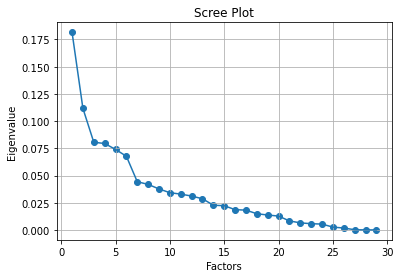

In [890]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,30),importance)
plt.plot(range(1,30),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

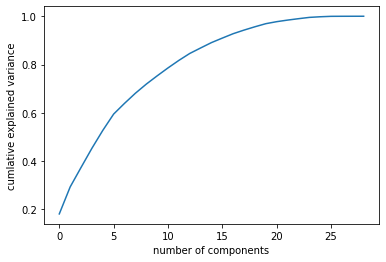

In [891]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [892]:
A=np.cumsum(pca.explained_variance_ratio_)
a

array([0.19361082, 0.30243354, 0.385165  , 0.4650019 , 0.53919764,
       0.60694434, 0.65032815, 0.69127602, 0.72780273, 0.76116474,
       0.79346295, 0.82363465, 0.84867347, 0.8718197 , 0.89149664,
       0.91020815, 0.92657829, 0.94115445, 0.95462843, 0.96549962,
       0.97505464, 0.98173563, 0.98816029, 0.99362292, 0.99753855,
       0.99969817, 0.9998885 , 0.99997117, 0.99999215])

In [894]:
#19 Feature
pca = PCA(n_components=19)
principalComponents_19 = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.18161617, 0.11165916, 0.0805736 , 0.07943193, 0.07400447,
       0.06769538, 0.04434255, 0.04185019, 0.03770086, 0.03423699,
       0.03293655, 0.03114634, 0.0286867 , 0.02272926, 0.02229812,
       0.01866529, 0.01821466, 0.01491695, 0.01374148])

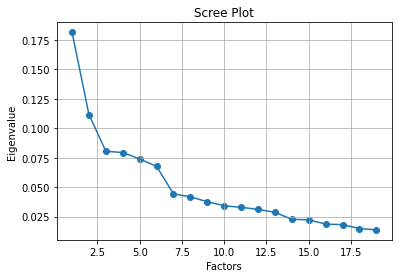

In [895]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,20),importance)
plt.plot(range(1,20),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

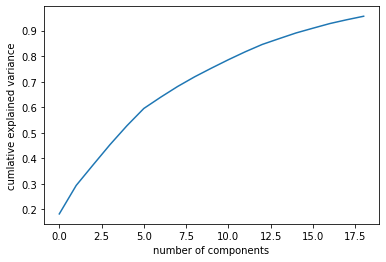

In [896]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [897]:
b=np.cumsum(pca.explained_variance_ratio_)
b

array([0.18161617, 0.29327533, 0.37384894, 0.45328087, 0.52728533,
       0.59498071, 0.63932326, 0.68117345, 0.71887431, 0.7531113 ,
       0.78604785, 0.81719418, 0.84588089, 0.86861015, 0.89090827,
       0.90957356, 0.92778822, 0.94270517, 0.95644665])

In [898]:
#15 Feature
pca = PCA(n_components=15)
principalComponents_15 = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.18161617, 0.11165916, 0.0805736 , 0.07943193, 0.07400447,
       0.06769538, 0.04434255, 0.04185019, 0.03770086, 0.03423699,
       0.03293655, 0.03114634, 0.0286867 , 0.02272926, 0.02229812])

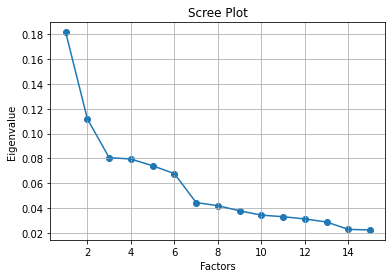

In [899]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,16),importance)
plt.plot(range(1,16),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

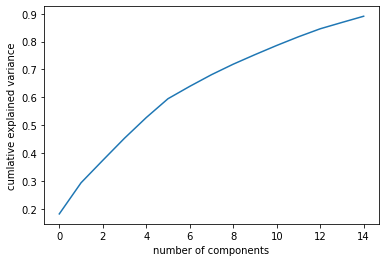

In [900]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [901]:
C=np.cumsum(pca.explained_variance_ratio_)
C

array([0.18161617, 0.29327533, 0.37384894, 0.45328087, 0.52728533,
       0.59498071, 0.63932326, 0.68117345, 0.71887431, 0.7531113 ,
       0.78604785, 0.81719418, 0.84588089, 0.86861015, 0.89090827])

In [902]:
#12 Feature
pca = PCA(n_components=12)
principalComponents_12 = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.18161617, 0.11165916, 0.0805736 , 0.07943193, 0.07400447,
       0.06769538, 0.04434255, 0.04185018, 0.03770085, 0.03423699,
       0.03293654, 0.03114632])

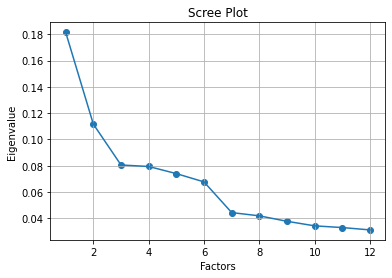

In [903]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,13),importance)
plt.plot(range(1,13),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

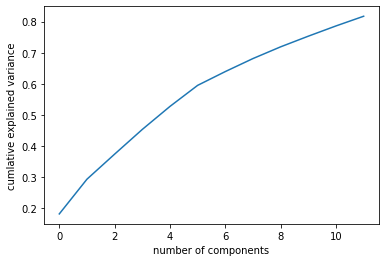

In [904]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [905]:
d=np.cumsum(pca.explained_variance_ratio_)
d

array([0.18161617, 0.29327533, 0.37384894, 0.45328087, 0.52728533,
       0.59498071, 0.63932326, 0.68117344, 0.71887429, 0.75311128,
       0.78604782, 0.81719414])

In [906]:
#9 Feature
pca = PCA(n_components=9)
principalComponents_9 = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.18161617, 0.11165916, 0.0805736 , 0.07943193, 0.07400446,
       0.06769536, 0.04434221, 0.04185013, 0.03770018])

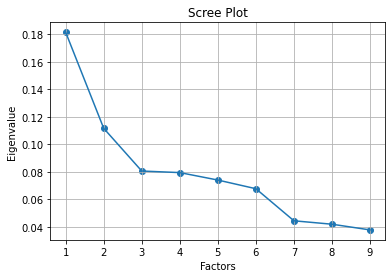

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,10),importance)
plt.plot(range(1,10),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

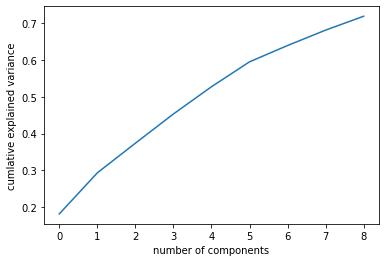

In [907]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
e=np.cumsum(pca.explained_variance_ratio_)
e

array([0.18161617, 0.29327533, 0.37384894, 0.45328086, 0.52728532,
       0.59498065, 0.63932155, 0.68117112, 0.71887176])

# Normal Activity PCA Data

In [908]:
#29 Features 
pca = PCA(n_components=29)
principalComponents_normal_29 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([1.93610818e-01, 1.08822721e-01, 8.27314603e-02, 7.98369061e-02,
       7.41957388e-02, 6.77466949e-02, 4.33838122e-02, 4.09478678e-02,
       3.65267075e-02, 3.33620182e-02, 3.22982062e-02, 3.01716973e-02,
       2.50388250e-02, 2.31462304e-02, 1.96769328e-02, 1.87115158e-02,
       1.63701414e-02, 1.45761531e-02, 1.34739789e-02, 1.08711988e-02,
       9.55501293e-03, 6.68099182e-03, 6.42466002e-03, 5.46263529e-03,
       3.91562978e-03, 2.15961438e-03, 1.90330823e-04, 8.26741057e-05,
       2.09809036e-05])

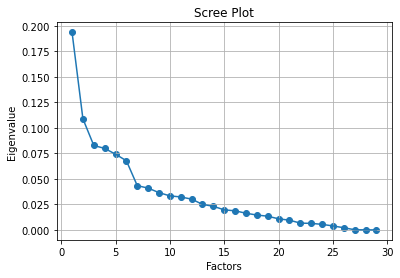

In [909]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,30),importance)
plt.plot(range(1,30),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

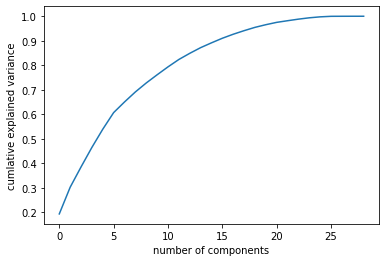

In [910]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [911]:
a=np.cumsum(pca.explained_variance_ratio_)
a

array([0.19361082, 0.30243354, 0.385165  , 0.4650019 , 0.53919764,
       0.60694434, 0.65032815, 0.69127602, 0.72780273, 0.76116474,
       0.79346295, 0.82363465, 0.84867347, 0.8718197 , 0.89149664,
       0.91020815, 0.92657829, 0.94115445, 0.95462843, 0.96549962,
       0.97505464, 0.98173563, 0.98816029, 0.99362292, 0.99753855,
       0.99969817, 0.9998885 , 0.99997117, 0.99999215])

In [ ]:
# Feature 19

In [912]:
pca = PCA(n_components=19)
principalComponents_normal_19 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.19361082, 0.10882272, 0.08273146, 0.07983691, 0.07419574,
       0.06774669, 0.04338381, 0.04094787, 0.03652671, 0.03336202,
       0.03229821, 0.0301717 , 0.02503883, 0.02314623, 0.01967693,
       0.01871152, 0.01637014, 0.01457615, 0.01347398])

In [913]:
principalComponents_normal_19.shape

(677785, 19)

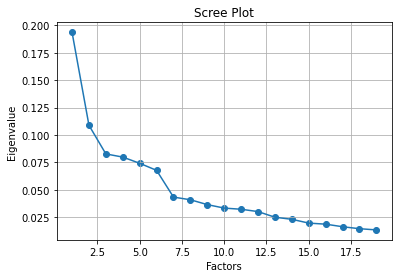

In [914]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,20),importance)
plt.plot(range(1,20),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

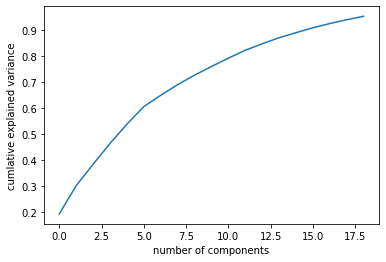

In [915]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [917]:
b=np.cumsum(pca.explained_variance_ratio_)
b

array([0.19361082, 0.30243354, 0.385165  , 0.4650019 , 0.53919764,
       0.60694434, 0.65032815, 0.69127602, 0.72780273, 0.76116474,
       0.79346295, 0.82363465, 0.84867347, 0.8718197 , 0.89149664,
       0.91020815, 0.92657829, 0.94115445, 0.95462843])

In [ ]:
# Normal Feature 15

In [918]:
pca = PCA(n_components=15)
principalComponents_normal_15 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.19361082, 0.10882272, 0.08273146, 0.07983691, 0.07419574,
       0.06774669, 0.04338381, 0.04094787, 0.03652671, 0.03336202,
       0.03229821, 0.0301717 , 0.02503883, 0.02314623, 0.01967693])

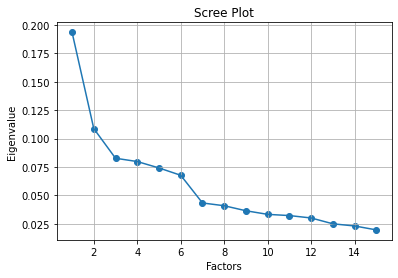

In [919]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,16),importance)
plt.plot(range(1,16),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

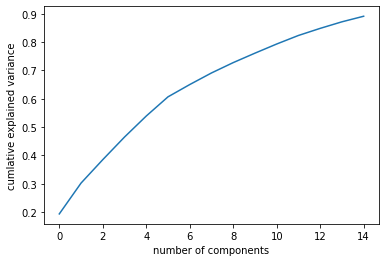

In [920]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [921]:
c=np.cumsum(pca.explained_variance_ratio_)
c

array([0.19361082, 0.30243354, 0.385165  , 0.4650019 , 0.53919764,
       0.60694434, 0.65032815, 0.69127602, 0.72780273, 0.76116474,
       0.79346295, 0.82363465, 0.84867347, 0.8718197 , 0.89149664])

In [ ]:
# Feature 12 

In [922]:
pca = PCA(n_components=12)
principalComponents_normal_12 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.19361082, 0.10882272, 0.08273146, 0.07983691, 0.07419574,
       0.06774669, 0.0433838 , 0.04094787, 0.03652671, 0.03336197,
       0.03229819, 0.03017164])

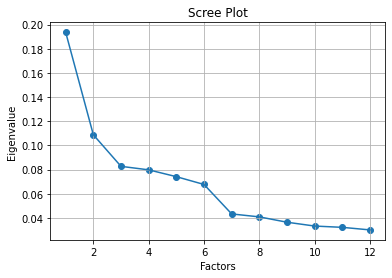

In [923]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,13),importance)
plt.plot(range(1,13),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

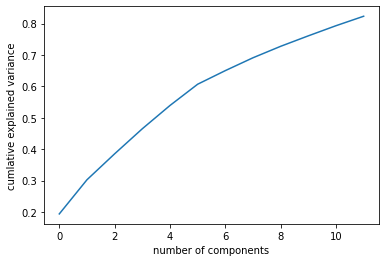

In [924]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [925]:
d=np.cumsum(pca.explained_variance_ratio_)
d

array([0.19361082, 0.30243354, 0.385165  , 0.4650019 , 0.53919764,
       0.60694434, 0.65032814, 0.69127601, 0.72780271, 0.76116469,
       0.79346288, 0.82363452])

In [ ]:
#Normal Feature 9

In [926]:
pca = PCA(n_components=9)
principalComponents_normal_9 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.19361082, 0.10882272, 0.08273146, 0.0798369 , 0.07419574,
       0.06774669, 0.04338374, 0.04094777, 0.03652661])

In [927]:
print(principalComponents_normal_9.shape)

(677785, 9)


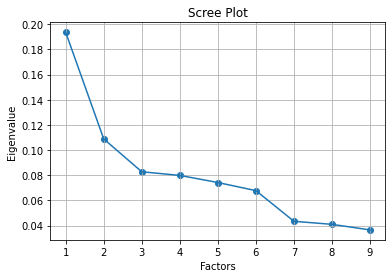

In [928]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,10),importance)
plt.plot(range(1,10),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

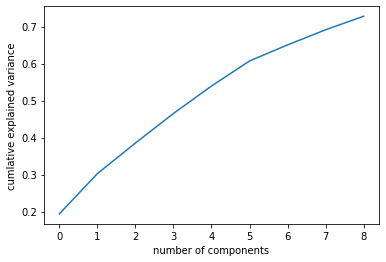

In [929]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [930]:
e=np.cumsum(pca.explained_variance_ratio_)
e

array([0.19361082, 0.30243354, 0.385165  , 0.4650019 , 0.53919764,
       0.60694433, 0.65032807, 0.69127584, 0.72780245])

# PCA Dimensionality Reduciton Based on # 30 Feaures
# Anormal Activity 

In [931]:
# 29 Feature 

In [932]:
pca = PCA(n_components=29)
principalComponents_anormal_29 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([2.69497353e-01, 1.21216362e-01, 1.03523697e-01, 8.72875661e-02,
       6.83058827e-02, 5.46527794e-02, 4.67508561e-02, 3.98425472e-02,
       3.51690985e-02, 3.15703487e-02, 2.88007208e-02, 2.33493010e-02,
       1.98924034e-02, 1.75415440e-02, 1.39344418e-02, 1.05315230e-02,
       8.39173191e-03, 6.65301020e-03, 4.66428250e-03, 2.50477417e-03,
       1.75490242e-03, 1.38528304e-03, 1.33261519e-03, 1.17323837e-03,
       1.67682973e-04, 4.73943591e-05, 3.65181406e-05, 1.58146345e-05,
       6.32719214e-06])

In [933]:
principalComponents_anormal_29.shape

(22215, 29)

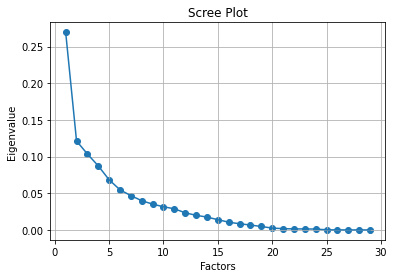

In [934]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,30),importance)
plt.plot(range(1,30),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

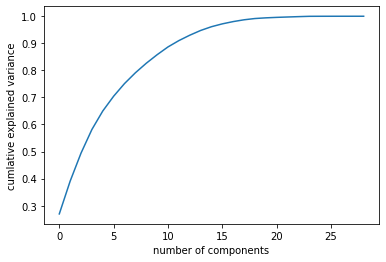

In [935]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [936]:
a_1=np.cumsum(pca.explained_variance_ratio_)
a_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614, 0.85781649,
       0.88661721, 0.90996651, 0.92985892, 0.94740046, 0.9613349 ,
       0.97186642, 0.98025816, 0.98691117, 0.99157545, 0.99408022,
       0.99583513, 0.99722041, 0.99855302, 0.99972626, 0.99989395,
       0.99994134, 0.99997786, 0.99999367, 1.        ])

In [937]:
#Feature 19
pca = PCA(n_components=19)
principalComponents_anormal_19 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.26949735, 0.12121636, 0.1035237 , 0.08728757, 0.06830588,
       0.05465278, 0.04675086, 0.03984255, 0.0351691 , 0.03157035,
       0.02880072, 0.0233493 , 0.0198924 , 0.01754154, 0.01393444,
       0.01053152, 0.00839173, 0.00665301, 0.00466428])

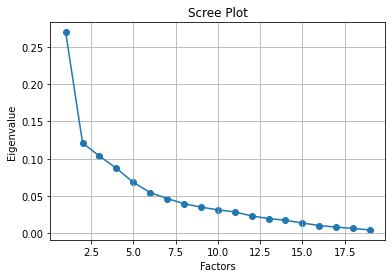

In [938]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,20),importance)
plt.plot(range(1,20),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

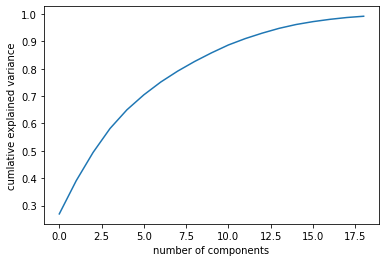

In [939]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [940]:
b_1=np.cumsum(pca.explained_variance_ratio_)
b_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614, 0.85781649,
       0.88661721, 0.90996651, 0.92985892, 0.94740046, 0.9613349 ,
       0.97186642, 0.98025816, 0.98691117, 0.99157545])

In [943]:
#Feature 15
pca = PCA(n_components=15)
principalComponents_anormal_15 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.26949735, 0.12121636, 0.1035237 , 0.08728757, 0.06830588,
       0.05465278, 0.04675086, 0.03984255, 0.0351691 , 0.03157035,
       0.02880072, 0.0233493 , 0.0198924 , 0.01754154, 0.01393444])

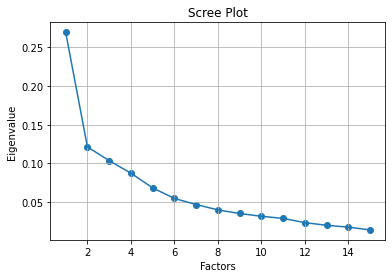

In [942]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,16),importance)
plt.plot(range(1,16),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

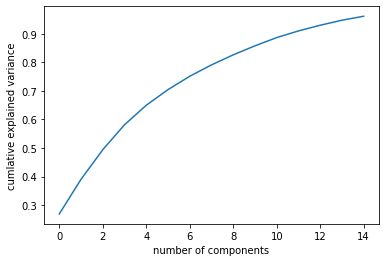

In [944]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [945]:
c_1=np.cumsum(pca.explained_variance_ratio_)
c_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614, 0.85781649,
       0.88661721, 0.90996651, 0.92985892, 0.94740046, 0.9613349 ])

In [946]:
#Feature 12
pca = PCA(n_components=12)
principalComponents_anormal_12 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.26949735, 0.12121636, 0.1035237 , 0.08728757, 0.06830588,
       0.05465278, 0.04675086, 0.03984255, 0.0351691 , 0.03157035,
       0.02880072, 0.0233493 ])

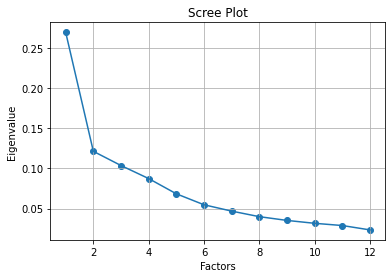

In [947]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,13),importance)
plt.plot(range(1,13),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

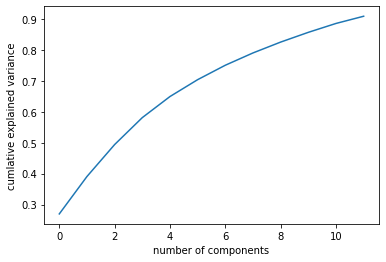

In [948]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [949]:
d_1=np.cumsum(pca.explained_variance_ratio_)
d_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614, 0.85781649,
       0.88661721, 0.90996651])

In [ ]:
# 9 Feature 

In [950]:
pca = PCA(n_components=9)
principalComponents_anormal_9 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.26949735, 0.12121636, 0.1035237 , 0.08728757, 0.06830588,
       0.05465278, 0.04675086, 0.03984255, 0.0351691 ])

In [951]:
print(principalComponents_anormal_9.shape)

(22215, 9)


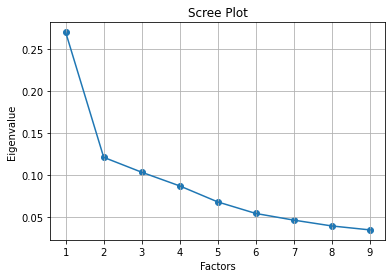

In [952]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,10),importance)
plt.plot(range(1,10),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

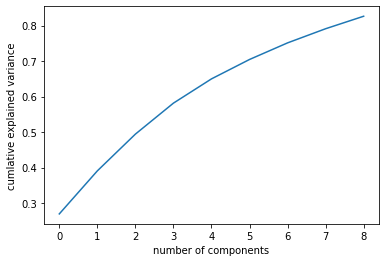

In [953]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [954]:
e_1=np.cumsum(pca.explained_variance_ratio_)
e_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614])

# PCA Dimensionality Reduciton _Anormal Data and KNN test 

# 1. PCA-29 Feature Dimensionality _Anoral Dataset 

In [955]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [956]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics


In [957]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
PCA_29a=principalComponents_anormal_29

In [958]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_29a_train, X_29a_test, y_2_train, y_2_test=train_test_split(PCA_29a, y_2, random_state=0)

In [959]:
knn.fit(X_29a_train, y_2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [960]:
print("X_29a_train shape",X_29a_train.shape )
print("y_2_train shape",y_2_train.shape )
print("X_29a_test shape",X_29a_test.shape )
print("y_2_test shape",y_2_test.shape )

X_29a_train shape (16661, 29)
y_2_train shape (16661, 10)
X_29a_test shape (5554, 29)
y_2_test shape (5554, 10)


In [962]:
y_pred=knn.predict(X_29a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean([y_pred==y_2_test])))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9577


In [963]:
print(classification_report(y_2_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.86      0.69      0.77      1292
           2       0.77      0.08      0.14       129
           3       0.00      0.00      0.00       136
           4       0.45      0.03      0.06       279
           5       0.84      0.61      0.71      1377
           6       0.99      0.89      0.94      1832
           7       0.71      0.56      0.62       452
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00         7

   micro avg       0.89      0.66      0.76      5554
   macro avg       0.46      0.29      0.32      5554
weighted avg       0.83      0.66      0.72      5554
 samples avg       0.66      0.66      0.66      5554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2 PCA-19 Anormal Feature Dataset KNN test

In [964]:
PCA_19a=principalComponents_anormal_19

In [966]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_19a_train, X_19a_test, y_2_train, y_2_test=train_test_split(PCA_19a, y_2, random_state=0)

In [967]:
print("X_19a_train shape",X_19a_train.shape )
print("y_2_train shape",y_2_train.shape )

X_19a_train shape (16661, 19)
y_2_train shape (16661, 10)


In [968]:
print("X_19a_test shape",X_19a_test.shape )
print("y_2_test shape",y_2_test.shape )

X_19a_test shape (5554, 19)
y_2_test shape (5554, 10)


In [969]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)

In [970]:
knn.fit(X_19a_train, y_2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [971]:
y_pred=knn.predict(X_19a_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [972]:
print("Test score:{:.4f}".format(np.mean([y_pred==y_2_test])))

Test score:0.9571


In [ ]:
print(classification_report(y_2_test, y_pred))

# 3 PCA -15 FEATURE Anormal Dataset KNn test

In [973]:
PCA_15a=principalComponents_anormal_15

In [974]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_15a_train, X_15a_test, y_2_train, y_2_test=train_test_split(PCA_15a, y_2, random_state=0)

In [975]:
print("X_15a_train shape",X_15a_train.shape )
print("y_2_train shape",y_2_train.shape )
print("X_15a_test shape",X_15a_test.shape )
print("y_2_test shape",y_2_test.shape )

X_15a_train shape (16661, 15)
y_2_train shape (16661, 10)
X_15a_test shape (5554, 15)
y_2_test shape (5554, 10)


In [977]:
knn.fit(X_15a_train, y_2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [978]:
y_pred=knn.predict(X_15a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean([y_pred==y_2_test])))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9570


In [979]:
print(classification_report(y_2_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.83      0.69      0.75      1292
           2       0.92      0.09      0.17       129
           3       0.00      0.00      0.00       136
           4       0.41      0.05      0.09       279
           5       0.82      0.65      0.72      1377
           6       0.98      0.90      0.94      1832
           7       0.69      0.62      0.65       452
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00         7

   micro avg       0.87      0.67      0.76      5554
   macro avg       0.47      0.30      0.33      5554
weighted avg       0.82      0.67      0.72      5554
 samples avg       0.67      0.67      0.67      5554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#PCA 12 Features ANormal Dataset

In [980]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
PCA_12a=principalComponents_anormal_12

In [981]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_12a_train, X_12a_test, y_2_train, y_2_test=train_test_split(PCA_12a, y_2, random_state=0)

In [984]:
knn.fit(X_12a_train, y_2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [985]:
y_pred=knn.predict(X_12a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean([y_pred==y_2_test])))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9562


In [986]:
print(classification_report(y_2_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.81      0.69      0.74      1292
           2       0.77      0.08      0.14       129
           3       0.00      0.00      0.00       136
           4       0.38      0.05      0.09       279
           5       0.82      0.64      0.72      1377
           6       0.98      0.89      0.94      1832
           7       0.69      0.59      0.63       452
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00         7

   micro avg       0.87      0.67      0.75      5554
   macro avg       0.45      0.29      0.33      5554
weighted avg       0.81      0.67      0.72      5554
 samples avg       0.67      0.67      0.67      5554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. PCA 9 Feature Anormal dataset 

In [987]:

PCA_9a=principalComponents_anormal_9

In [988]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_9a_train, X_9a_test, y_2_train, y_2_test=train_test_split(PCA_9a, y_2, random_state=0)

In [989]:
knn.fit(X_9a_train, y_2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [991]:
y_pred=knn.predict(X_9a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean([y_pred==y_2_test])))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9553


In [992]:
print(classification_report(y_2_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.79      0.67      0.73      1292
           2       0.50      0.05      0.09       129
           3       0.00      0.00      0.00       136
           4       0.40      0.05      0.09       279
           5       0.81      0.64      0.71      1377
           6       0.98      0.90      0.94      1832
           7       0.69      0.58      0.63       452
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00         7

   micro avg       0.86      0.66      0.75      5554
   macro avg       0.42      0.29      0.32      5554
weighted avg       0.80      0.66      0.71      5554
 samples avg       0.66      0.66      0.66      5554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA Dimensionality Reduction Stack ( axis=0) Normal+Anormal

In [993]:
# 29 Feature Stack 

In [994]:
PCA_29=np.concatenate((principalComponents_normal_29, principalComponents_anormal_29 ),axis=0)

In [995]:
PCA_29.shape

(700000, 29)

In [996]:
# 19 Feature Stack 

In [997]:
PCA_19=np.concatenate((principalComponents_normal_19, principalComponents_anormal_19 ),axis=0)

In [998]:
PCA_19.shape

(700000, 19)

In [ ]:
## 15 Feature Stack 

In [999]:
PCA_15=np.concatenate((principalComponents_normal_15, principalComponents_anormal_15 ),axis=0)

In [ ]:
# 12 Feature Stack 

In [1000]:
PCA_12=np.concatenate((principalComponents_normal_12, principalComponents_anormal_12 ),axis=0)

In [ ]:
## 9 Feature Stack 

In [1001]:
PCA_9=np.concatenate((principalComponents_normal_9, principalComponents_anormal_9 ),axis=0)

In [ ]:
# Target stack

In [1002]:
y=np.concatenate((y_1, y_2),axis=0)
y.shape

(700000, 10)

# Split the reduction data into training, test

In [ ]:
# 29 PCA Dataset split 

In [1017]:
from sklearn.model_selection import train_test_split

In [1016]:
X_29F_train, X_29F_test, y_train, y_test=train_test_split(PCA_29,y, random_state=0)

In [1005]:
PCA_29.shape

(700000, 29)

In [1015]:
print("X_29F_train shape",X_29F_train.shape )
print("y_train shape",y_train.shape )

X_29F_train shape (525000, 29)
y_train shape (525000, 10)


In [1018]:
print("X_29F_test shape",X_29F_test.shape )
print("y_test shape",y_test.shape )

X_29F_test shape (175000, 29)
y_test shape (175000, 10)


In [1019]:
# 19 PCA Dataset split 
X_19F_train, X_19F_test, y_train, y_test=train_test_split(PCA_19,y, random_state=0)
print("X_19F_train shape",X_19F_train.shape )
print("y_train shape",y_train.shape )
print("X_19F_test shape",X_19F_test.shape )
print("y_test shape",y_test.shape )

X_19F_train shape (525000, 19)
y_train shape (525000, 10)
X_19F_test shape (175000, 19)
y_test shape (175000, 10)


In [1020]:
# 15 PCA Dataset split 
X_15F_train, X_15F_test, y_train, y_test=train_test_split(PCA_15,y, random_state=0)
print("X_15F_train shape",X_15F_train.shape )
print("y_train shape",y_train.shape )
print("X_15F_test shape",X_15F_test.shape )
print("y_test shape",y_test.shape )

X_15F_train shape (525000, 15)
y_train shape (525000, 10)
X_15F_test shape (175000, 15)
y_test shape (175000, 10)


In [1022]:
# 12 PCA Dataset split 
X_12F_train, X_12F_test, y_train, y_test=train_test_split(PCA_12,y, random_state=42)
print("X_12F_train shape",X_12F_train.shape )
print("y_train shape",y_train.shape )
print("X_12F_test shape",X_12F_test.shape )
print("y_test shape",y_test.shape )

X_12F_train shape (525000, 12)
y_train shape (525000, 10)
X_12F_test shape (175000, 12)
y_test shape (175000, 10)


In [1024]:
# 9 PCA Dataset split 
X_9F_train, X_9F_test, y_train, y_test=train_test_split(PCA_9,y, random_state=0)
print("X_9F_train shape",X_9F_train.shape )
print("y_train shape",y_train.shape )
print("X_9F_test shape",X_9F_test.shape )
print("y_test shape",y_test.shape )

X_9F_train shape (525000, 9)
y_train shape (525000, 10)
X_9F_test shape (175000, 9)
y_test shape (175000, 10)


# Traing Model KNN

In [1026]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

# 29  Feature Concated Dataset test 

In [1027]:
knn.fit(X_29F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

# Evaluating the model 

In [1028]:
y_pred=knn.predict(X_29F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [1029]:
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))

Test score:0.9986


In [1030]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169574
           1       0.85      0.69      0.76      1280
           2       1.00      0.06      0.12       139
           3       0.00      0.00      0.00       149
           4       0.55      0.06      0.10       299
           5       0.81      0.60      0.69      1286
           6       0.98      0.90      0.94      1813
           7       0.67      0.56      0.61       397
           8       1.00      0.02      0.03        59
           9       0.00      0.00      0.00         4

   micro avg       1.00      0.99      0.99    175000
   macro avg       0.69      0.39      0.43    175000
weighted avg       0.99      0.99      0.99    175000
 samples avg       0.99      0.99      0.99    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 19 Feature  Concated Complete dataset

In [1031]:
knn.fit(X_19F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [1032]:
y_pred=knn.predict(X_19F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [1033]:
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))

Test score:0.9986


In [1034]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169574
           1       0.84      0.68      0.75      1280
           2       0.90      0.06      0.12       139
           3       0.00      0.00      0.00       149
           4       0.46      0.06      0.10       299
           5       0.81      0.60      0.69      1286
           6       0.98      0.90      0.94      1813
           7       0.67      0.59      0.62       397
           8       1.00      0.02      0.03        59
           9       0.00      0.00      0.00         4

   micro avg       1.00      0.99      0.99    175000
   macro avg       0.67      0.39      0.43    175000
weighted avg       0.99      0.99      0.99    175000
 samples avg       0.99      0.99      0.99    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 15 Feature Complete dataset

In [1035]:
knn.fit(X_15F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [1036]:
y_pred=knn.predict(X_15F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [1037]:
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))

Test score:0.9986


In [1038]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169574
           1       0.84      0.66      0.74      1280
           2       0.83      0.07      0.13       139
           3       0.00      0.00      0.00       149
           4       0.50      0.06      0.10       299
           5       0.81      0.62      0.70      1286
           6       0.97      0.90      0.93      1813
           7       0.68      0.59      0.63       397
           8       1.00      0.03      0.07        59
           9       0.00      0.00      0.00         4

   micro avg       1.00      0.99      0.99    175000
   macro avg       0.66      0.39      0.43    175000
weighted avg       0.99      0.99      0.99    175000
 samples avg       0.99      0.99      0.99    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 12 Features Concated Features

In [1039]:
knn.fit(X_12F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [1040]:
y_pred=knn.predict(X_12F_test)

In [1041]:
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))

Test score:0.9938


In [1042]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    169574
           1       0.00      0.00      0.00      1280
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       149
           4       0.00      0.00      0.00       299
           5       0.00      0.00      0.00      1286
           6       0.00      0.00      0.00      1813
           7       0.00      0.00      0.00       397
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00         4

   micro avg       0.97      0.97      0.97    175000
   macro avg       0.10      0.10      0.10    175000
weighted avg       0.94      0.97      0.95    175000
 samples avg       0.97      0.97      0.97    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 9 Features Complete dataset

In [1043]:
knn.fit(X_9F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [1044]:
y_pred=knn.predict(X_9F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [1045]:
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))

Test score:0.9986


In [1046]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169574
           1       0.80      0.62      0.70      1280
           2       0.38      0.02      0.04       139
           3       0.00      0.00      0.00       149
           4       0.55      0.06      0.10       299
           5       0.82      0.60      0.69      1286
           6       0.97      0.89      0.93      1813
           7       0.71      0.54      0.61       397
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00         4

   micro avg       1.00      0.99      0.99    175000
   macro avg       0.52      0.37      0.41    175000
weighted avg       0.99      0.99      0.99    175000
 samples avg       0.99      0.99      0.99    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Complete Activity PCA data KNn Assessment 

In [1047]:
X_29_train, X_29_test, y_train, y_test=train_test_split(principalComponents_29, y, random_state=42)
print("X_29_train shape",X_29_train.shape )
print("y_train shape",y_train.shape )

X_29_train shape (525000, 29)
y_train shape (525000, 10)


In [1048]:
print("X_29_test shape",X_29_test.shape )
print("y_test shape",y_test.shape )

X_29_test shape (175000, 29)
y_test shape (175000, 10)


In [1049]:
X_19_train, X_19_test, y_train, y_test=train_test_split(principalComponents_19,y, random_state=42)
print("X_19_train shape",X_19_train.shape )
print("y_train shape",y_train.shape )
print("X_19_test shape",X_19_test.shape )
print("y_test shape",y_test.shape )

X_19_train shape (525000, 19)
y_train shape (525000, 10)
X_19_test shape (175000, 19)
y_test shape (175000, 10)


In [1050]:
X_15_train, X_15_test, y_train, y_test=train_test_split(principalComponents_15,y, random_state=42)
print("X_15_train shape",X_15_train.shape )
print("y_train shape",y_train.shape )
print("X_15_test shape",X_15_test.shape )
print("y_test shape",y_test.shape )

X_15_train shape (525000, 15)
y_train shape (525000, 10)
X_15_test shape (175000, 15)
y_test shape (175000, 10)


In [1051]:
X_12_train, X_12_test, y_train, y_test=train_test_split(principalComponents_12,y, random_state=42)
print("X_12_train shape",X_12_train.shape )
print("y_train shape",y_train.shape )
print("X_12_test shape",X_12_test.shape )
print("y_test shape",y_test.shape )

X_12_train shape (525000, 12)
y_train shape (525000, 10)
X_12_test shape (175000, 12)
y_test shape (175000, 10)


In [1052]:
X_9_train, X_9_test, y_train, y_test=train_test_split(principalComponents_9,y, random_state=42)
print("X_9_train shape",X_9_train.shape )
print("y_train shape",y_train.shape )
print("X_9_test shape",X_9_test.shape )
print("y_test shape",y_test.shape )

X_9_train shape (525000, 9)
y_train shape (525000, 10)
X_9_test shape (175000, 9)
y_test shape (175000, 10)


In [1053]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

In [1054]:
knn.fit(X_29_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [1055]:
y_pred=knn.predict(X_29_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [1056]:
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))

Test score:0.9955


In [1057]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    169534
           1       0.18      0.00      0.00      1251
           2       0.00      0.00      0.00       124
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00       272
           5       0.20      0.00      0.01      1323
           6       0.55      0.23      0.33      1853
           7       0.00      0.00      0.00       438
           8       0.00      0.00      0.00        55
           9       0.00      0.00      0.00         3

   micro avg       0.99      0.97      0.98    175000
   macro avg       0.19      0.12      0.13    175000
weighted avg       0.97      0.97      0.97    175000
 samples avg       0.97      0.97      0.97    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1058]:
#19 PCA
knn.fit(X_19_train, y_train)
y_pred=knn.predict(X_19_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_test, y_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9958
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    169534
           1       0.10      0.00      0.00      1251
           2       0.00      0.00      0.00       124
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00       272
           5       0.33      0.01      0.01      1323
           6       0.57      0.26      0.36      1853
           7       0.00      0.00      0.00       438
           8       0.00      0.00      0.00        55
           9       0.00      0.00      0.00         3

   micro avg       0.99      0.97      0.98    175000
   macro avg       0.20      0.13      0.14    175000
weighted avg       0.97      0.97      0.97    175000
 samples avg       0.97      0.97      0.97    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1059]:
#15 PCA
knn.fit(X_15_train, y_train)
y_pred=knn.predict(X_15_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_test, y_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9960
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    169534
           1       0.08      0.00      0.00      1251
           2       0.00      0.00      0.00       124
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00       272
           5       0.22      0.01      0.01      1323
           6       0.56      0.31      0.40      1853
           7       0.00      0.00      0.00       438
           8       0.00      0.00      0.00        55
           9       0.00      0.00      0.00         3

   micro avg       0.99      0.97      0.98    175000
   macro avg       0.18      0.13      0.14    175000
weighted avg       0.97      0.97      0.97    175000
 samples avg       0.97      0.97      0.97    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1060]:
knn.fit(X_12_train, y_train)
y_pred=knn.predict(X_12_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_test, y_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9957
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    169534
           1       0.15      0.00      0.00      1251
           2       0.00      0.00      0.00       124
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00       272
           5       0.29      0.01      0.02      1323
           6       0.55      0.25      0.34      1853
           7       0.00      0.00      0.00       438
           8       0.00      0.00      0.00        55
           9       0.00      0.00      0.00         3

   micro avg       0.99      0.97      0.98    175000
   macro avg       0.20      0.13      0.14    175000
weighted avg       0.97      0.97      0.97    175000
 samples avg       0.97      0.97      0.97    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1061]:
knn.fit(X_9_train, y_train)
y_pred=knn.predict(X_9_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean([y_pred==y_test])))
print(classification_report(y_test, y_pred))

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Test score:0.9956
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    169534
           1       0.19      0.00      0.01      1251
           2       0.00      0.00      0.00       124
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00       272
           5       0.35      0.01      0.02      1323
           6       0.54      0.23      0.33      1853
           7       0.00      0.00      0.00       438
           8       0.00      0.00      0.00        55
           9       0.00      0.00      0.00         3

   micro avg       0.99      0.97      0.98    175000
   macro avg       0.21      0.12      0.13    175000
weighted avg       0.97      0.97      0.97    175000
 samples avg       0.97      0.97      0.97    175000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
